In [ ]:
#data reading 
from google.colab import drive
drive.mount('/content/drive')

######## Q9
import os
import pandas as pd
import datetime
import pytz
import json
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,6) # adjust fig size *for all figs*

######## Q10 Customized tasks

####cleaning
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import text
from string import punctuation

####
!pip install langdetect
import langdetect
import random
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
import warnings
from nltk.sentiment import SentimentIntensityAnalyzer
####

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('all')

In [ ]:
directory = '/content/drive/MyDrive/ECE 219/Project 4/ECE219_tweet_data'


tweet_gh = 'tweets_#gohawks.txt'

tweet_gp = 'tweets_#gopatriots.txt' 

tweet_pat = 'tweets_#patriots.txt' 

tweet_49 = 'tweets_#sb49.txt'

tweet_super = 'tweets_#superbowl.txt'

tweet_nfl = 'tweets_#nfl.txt' 

gohawks_file = os.path.join(directory, tweet_gh)

gopatriots_file = os.path.join(directory, tweet_gp)

patriots_file = os.path.join(directory, tweet_pat)

sb49_file = os.path.join(directory, tweet_49)

superbowl_file = os.path.join(directory, tweet_super)

nfl_file = os.path.join(directory, tweet_nfl)

In [ ]:
def hashtag_stat(file_name, tag_name):
  tweet_file = open(file_name, 'r')
  date_time=[]
  tweet_tot = 0
  follower_tot = 0
  retweet_tot = 0
    
  for line in tweet_file:
      json_object = json.loads(line)
      tweet_tot = tweet_tot + 1
      unix_time = json_object['citation_date']
      follower_tot = follower_tot + json_object['author']['followers']
      retweet_tot = retweet_tot + json_object['metrics']['citations']['total']
      date_time.append(unix_time)

  start_time = min(date_time)
  end_time = max(date_time)
  hour_tot = int((end_time - start_time) / 3600)
  tweet_file.close()
    
  tweet_avg_hour = tweet_tot / hour_tot
  follower_avg = follower_tot / tweet_tot
  retweet_avg = retweet_tot / tweet_tot
  
  print('For ' + tag_name + ': ')
  print('Average number of tweets per hour:', tweet_avg_hour)
  print('Average number of followers of users posting the tweets per tweet:', follower_avg)
  print('Average number of retweets per tweet:', retweet_avg)
  print('\n')


In [ ]:
hashtag_stat(gohawks_file, '#gohawks')

hashtag_stat(gopatriots_file, '#gopatriots')

hashtag_stat(patriots_file, '#patriots')

hashtag_stat(sb49_file, '#sb49')

hashtag_stat(superbowl_file, '#SuperBowl')

hashtag_stat(nfl_file, '#NFL')

For #gohawks: 
Average number of tweets per hour: 292.598615916955
Average number of followers of users posting the tweets per tweet: 2217.9237355281984
Average number of retweets per tweet: 2.0132093991319877


For #gopatriots: 
Average number of tweets per hour: 40.95993031358885
Average number of followers of users posting the tweets per tweet: 1427.2526051635405
Average number of retweets per tweet: 1.4081919101697078


For #patriots: 
Average number of tweets per hour: 751.9129692832764
Average number of followers of users posting the tweets per tweet: 3280.4635616550277
Average number of retweets per tweet: 1.7852871288476946


For #sb49: 
Average number of tweets per hour: 1277.7474226804125
Average number of followers of users posting the tweets per tweet: 10374.160292019487
Average number of retweets per tweet: 2.52713444111402


For #SuperBowl: 
Average number of tweets per hour: 2074.8940170940173
Average number of followers of users posting the tweets per tweet: 8814.967994

In [ ]:
def plot_tweet_hour(file_name, tag_name):
  date_time = []
  hour_dict = {} 
  tweet_file = open(file_name, 'r')

  for line in tweet_file:
      json_object = json.loads(line)
      unix_time = json_object['citation_date']
      #datetime_object = datetime.datetime.fromtimestamp(unix_time)
      date_time.append(unix_time)

  start_time = min(date_time)
  start_time_object = datetime.datetime.fromtimestamp(start_time)
  
  datetime_hour = [int((i - start_time) / 3600) for i in date_time]

  for hour in datetime_hour:
    if hour in hour_dict:
      hour_dict[hour] = hour_dict[hour] + 1
    else:
      hour_dict[hour] = 1


  tweet_file.close()


  #plt.figure(figsize=(12,6))

  plt.bar(hour_dict.keys(), hour_dict.values(), width=0.4)
  plt.xlabel('Hour (start at : ' + str(start_time_object) + ')')
  plt.ylabel('Number of tweets')
  plt.title('Number of tweets in hour over time for ' + str(tag_name))
  plt.show()

  print('\n')

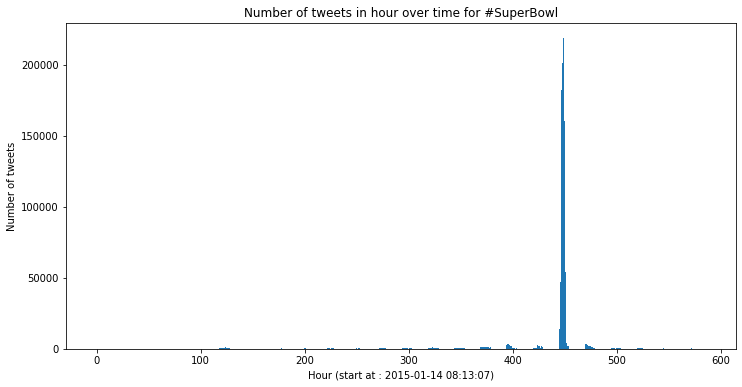

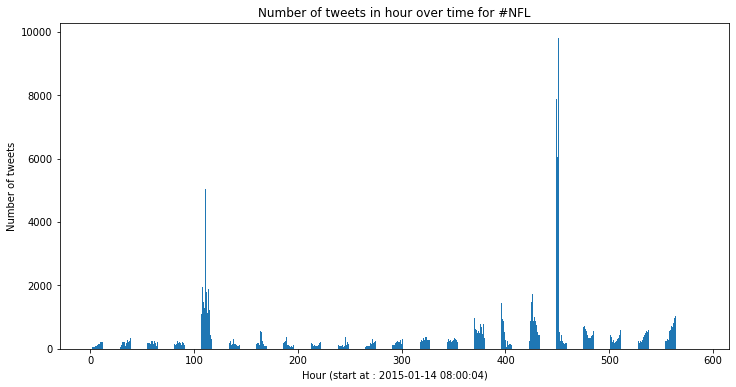

In [ ]:
plot_tweet_hour(superbowl_file, '#SuperBowl')
plot_tweet_hour(nfl_file, '#NFL')

# Tweet Text reading

In [ ]:
#finding json objects
tweet_file = open(superbowl_file, 'r')
json_names = set()
for line in tweet_file:
      json_object = json.loads(line)
      json_names.update(json_object.keys())

print(json_names)

{'type', 'tweet', 'highlight', 'url', 'original_author', 'firstpost_date', 'author', 'citation_url', 'citation_date', 'metrics', 'title'}


In [ ]:
# data inspection
tweet_file = open(superbowl_file, 'r')
data= []

for line in tweet_file:
    json_object = json.loads(line)
    tweet_data = {
          'title': json_object['title']
            }
    data.append(tweet_data)

num_tweets = len(data)
print(num_tweets)

1213813


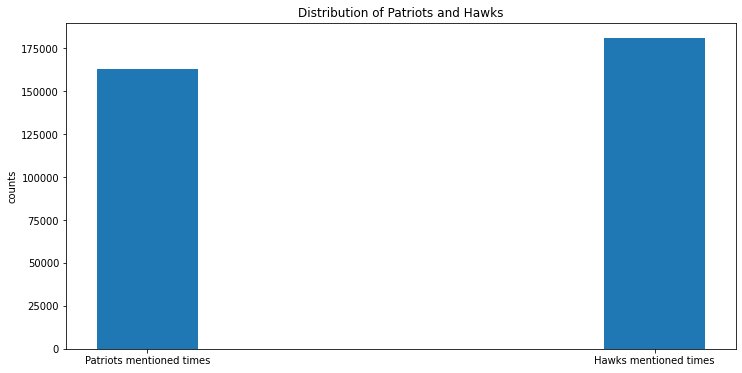

In [ ]:
tweet_file = open(superbowl_file, 'r')
count_p = 0
count_h = 0


for line in tweet_file:
    json_object = json.loads(line)
    if 'patriots' in json_object['title'] or 'Patriots' in json_object['title']:
        count_p += 1
    if 'hawks' in json_object['title'] or 'Hawks' in json_object['title']:
        count_h += 1

x = ['Patriots mentioned times', 'Hawks mentioned times']
y = [count_p, count_h]

#print(count_p, count_h)
plt.bar(x, y, width=0.2)

plt.title('Distribution of Patriots and Hawks')
plt.ylabel('counts')

plt.show()

In [ ]:
#to get user post counts

tweet_file = open(superbowl_file, 'r')
user_counts = {}
for line in tweet_file:
  json_object = json.loads(line)
  author = json_object['author']['name']
  if author in user_counts:
    user_counts[author] += 1
  else:
    user_counts[author] = 1

#### running time 2 mins

In [ ]:
tweet_file = open(superbowl_file, 'r')
data= []

for line in tweet_file:
    json_object = json.loads(line)
    author = json_object['author']['name']
    unix_time = json_object['citation_date']
    tweet_data = {
          'title': json_object['title'],
          'timestamp' : unix_time,
          'active factor': user_counts[author],
          'number of words': len(json_object['title'].split()),
          'followers': int(json_object['author']['followers']),
          'retweet': json_object['metrics']['citations']['total']
            }
    data.append(tweet_data)

num_tweets = len(data)
num_to_select = int(num_tweets * 0.01)

selected_tweets = random.sample(data, num_to_select)

In [ ]:
df = pd.DataFrame(selected_tweets)

In [ ]:
display(df)

,title,timestamp,active factor,number of words,followers,retweet
0,It's strange to wake up &amp; see feed full of...,1422871400,1,24,28,1
1,Need #morecowbell @TODAYshow: What did you thi...,1422843820,1,14,190,1
2,Amazing night!! @AndrewAXSTV #SuperBowl2015 #S...,1422784407,6,11,1332,1
3,Los tiburones bailarines de Katy Perry en el #...,1423118304,1,12,5,1
4,Need a FREE ride? Use my @lyft #promocode MO22...,1422848407,4,22,438,7
...,...,...,...,...,...,...
12133,@Babadoosh1 #Free #Superbowl #ViewGuard #Patri...,1422984433,1045,17,631,1
12134,Why was #GoDaddy's ad so poor this year? Becau...,1422838008,6,17,426,1
12135,#petecarroll #SuperBowlXLIX #marshawnlynch #se...,1422865730,1,6,378,3
12136,Dominos will be taking a beating tonight! #Sup...,1422822294,2,10,132,1


# Tweet Text Cleaning

In [ ]:
wnl = nltk.wordnet.WordNetLemmatizer()

ps = nltk.stem.PorterStemmer()

stop_words_skt = text.ENGLISH_STOP_WORDS

stop_words_en = stopwords.words('english')

combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

analyzer = CountVectorizer().build_analyzer()

# clean function is adopted from the Porject-1 maual. The fuction efficiency is improved by the commented lines.

def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  texter = re.sub(r'\d+', '', texter) # exclude numbers
  texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter) # Replace characters other than A-Za-z0-9 and decimal values with space 
  texter = re.sub('\s+',' ', texter) #  # Eliminate duplicate whitespaces using wildcards
  texter = texter.lower() # convert the text to lower case
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
      texter = ""
  return texter

# penn2morphy function is adopted form Project1-Discussion_Material_Part3.ipynb

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

# lemmatize_sent function is adopted form Project1-Discussion_Material_Part3.ipynb

def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

# stem_rmv_punc function is adopted form Project1-Discussion_Material_Part3.ipynb

def stem_rmv_punc(doc):
    # this should have been at the sentence-level because the pos-tag performs best at sentence-level
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

# with help from one of the TAs during the office hour

def stemming(text):
    text_stemmed = []
    for t in text:
        words = [ps.stem(word) for word in nltk.word_tokenize(t)]
        sentence = ' '.join(words)
        text_stemmed.append(sentence)
    return text_stemmed

def lemmatize(text):
    text_lemmatized = []
    for t in text:
        words = [wnl.lemmatize(word, pos=penn2morphy(tag))
                 for word, tag in pos_tag(nltk.word_tokenize(t))]
        sentence = ' '.join(words)
        text_lemmatized.append(sentence) 
    return text_lemmatized

In [ ]:
sia = SentimentIntensityAnalyzer()


def get_sentiment_score(tweet_text):
  
    sentiment_scores = sia.polarity_scores(tweet_text)

    return sentiment_scores['compound']


def detect_lang(text):
    try:
        return langdetect.detect(text)
    except:
        return 'unknown'


def df_processing(df):
  #### detect english
  #df = df[df['title'].str.contains('\w')]
  df['language'] = df['title'].apply(lambda x: detect_lang(x))
  df = df.loc[df['language'] == 'en'].copy()
  #### clean and lemma
  df.loc[:, 'clean_lemma_title'] = lemmatize(df['title'].apply(clean))
  #### sentiment sore
  df.loc[:, 'sentiment_score'] = df['clean_lemma_title'].apply(get_sentiment_score)

  display(df)
  return df

In [ ]:
df_cleaned = df_processing(df)

,title,timestamp,active factor,number of words,followers,retweet,language,clean_lemma_title,sentiment_score
0,It's strange to wake up &amp; see feed full of...,1422871400,1,24,28,1,en,it s strange to wake up and see feed full of s...,0.3400
1,Need #morecowbell @TODAYshow: What did you thi...,1422843820,1,14,190,1,en,need morecowbell todayshow what do you think o...,0.0000
2,Amazing night!! @AndrewAXSTV #SuperBowl2015 #S...,1422784407,6,11,1332,1,en,amaze night andrewaxstv superbowl superbowl di...,0.9423
4,Need a FREE ride? Use my @lyft #promocode MO22...,1422848407,4,22,438,7,en,need a free ride use my lyft promocode mo and ...,0.5106
5,#patriots #Superbowl #youknowwhyimhere lol htt...,1422916729,3,5,4109,1,en,patriot superbowl youknowwhyimhere lol http t ...,0.4215
...,...,...,...,...,...,...,...,...,...
12133,@Babadoosh1 #Free #Superbowl #ViewGuard #Patri...,1422984433,1045,17,631,1,en,babadoosh free superbowl viewguard patriot win...,0.7964
12134,Why was #GoDaddy's ad so poor this year? Becau...,1422838008,6,17,426,1,en,why be godaddy s ad so poor this year because ...,-0.7344
12135,#petecarroll #SuperBowlXLIX #marshawnlynch #se...,1422865730,1,6,378,3,en,petecarroll superbowlxlix marshawnlynch seattl...,0.0000
12136,Dominos will be taking a beating tonight! #Sup...,1422822294,2,10,132,1,en,domino will be take a beating tonight superbow...,-0.4588


# DataFrame Statistics

In [ ]:
display(df_cleaned['sentiment_score'].mean())
display(df_cleaned['retweet'].mean())

0.18002003284072252

2.2824302134646963

In [ ]:
scaler = StandardScaler()

df_retweet = df_cleaned['retweet'].values

df_num_feature = df_cleaned.drop(columns = ['title','timestamp','language','clean_lemma_title','retweet'])

df_num_value = df_num_feature.values

df_standard = scaler.fit_transform(df_num_value)

display(df_retweet)
print('\n')
display(df_standard)

array([1, 1, 1, ..., 1, 1, 1])

array([[-0.01632321,  0.68936196,  0.04865905, -2.41056339],
       [ 0.5803452 , -0.04779325,  0.07932709,  0.75796042],
       [-0.23051187,  1.42651716, -0.04466782, -0.42846272],
       ...,
       [-0.23051187,  2.16367237, -0.06110063, -1.77815282],
       [ 0.28966059,  1.42651716, -0.06166752,  1.47548883],
       [-0.23051187,  1.61080596, -0.0612196 ,  0.25148442]])

In [ ]:
X = df_standard

y = df_retweet

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    

In [ ]:
penalty_parameter = [10**-3, 10**-2, 10**-1, 1, 10]
warnings.filterwarnings("ignore")

ml_param = {    
    'hidden_layer_sizes': [(10,), (20,), (10,10), (20,20)],
    'alpha': penalty_parameter,
}


mlp = MLPRegressor(max_iter=1000)

# Create the grid search object
nn_grid = GridSearchCV(mlp, ml_param, cv=10, scoring='neg_root_mean_squared_error')

# Fit the grid search object to the data
nn_grid.fit(X_train, y_train)


print('Best Netural Network RMSE:', -nn_grid.best_score_)
print('Best Netural Network parameter:', nn_grid.best_params_)

mse_test_nn = mean_squared_error(y_test, nn_grid.predict(X_test))

rmse_test_nn = np.sqrt(mse_test_nn)

print("Best Netural Network RMSE on test set:", rmse_test_nn)

Best Netural Network RMSE: 9.238873776712472
Best Netural Network parameter: {'alpha': 10, 'hidden_layer_sizes': (20,)}
Best Netural Network RMSE on test set: 81.34979100928929


In [ ]:
# desicon trees baseline 
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dtr = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dtr, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error')
dt_grid.fit(X_train, y_train)


print('Best Decision Tree RMSE:', -dt_grid.best_score_)
print('Best Decision Tree parameter:', dt_grid.best_params_)

mse_test_dt = mean_squared_error(y_test, dt_grid.predict(X_test))

rmse_test_dt = np.sqrt(mse_test_dt)

print("Best Decision Tree RMSE on test set:", rmse_test_dt)

Best Decision Tree RMSE: 11.215019432659679
Best Decision Tree parameter: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Decision Tree RMSE on test set: 81.91747206636653


In [ ]:
#random baseline

y_pred_random = np.random.uniform(low=y_test.min(), high=y_test.max(), size=len(y_test))

# Calculate RMSE between true values and random predictions
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print("Random baseline RMSE: ", rmse_random)

Random baseline RMSE:  301.8206654636384


# Relative Time

In [ ]:
X = df_cleaned['clean_lemma_title']

timestamp_list = df_cleaned['timestamp'].values

start_time = timestamp_list.min()

y = []

for timestamp in timestamp_list:
  relative_time = timestamp -start_time
  y.append(relative_time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidfvector = TfidfVectorizer(min_df=3, stop_words='english', analyzer ='word')

X_train = tfidfvector.fit_transform(X_train)

X_test = tfidfvector.transform(X_test)

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [ ]:
penalty_parameter = [1,10]
warnings.filterwarnings("ignore")

ml_param = {    
    'hidden_layer_sizes': [(10,),(20,),(10,10)],
    'alpha': penalty_parameter,
}


mlp = MLPRegressor(max_iter=1000)

# Create the grid search object
nn_grid = GridSearchCV(mlp, ml_param, cv=10, scoring='neg_root_mean_squared_error')

# Fit the grid search object to the data
nn_grid.fit(X_train_svd, y_train)


print('Best Netural Network RMSE:', -nn_grid.best_score_)
print('Best Netural Network parameter:', nn_grid.best_params_)

mse_test_nn = mean_squared_error(y_test, nn_grid.predict(X_test_svd))

rmse_test_nn = np.sqrt(mse_test_nn)

print("Best Netural Network RMSE on test set:", rmse_test_nn)

Best Netural Network RMSE: 274842.4007950005
Best Netural Network parameter: {'alpha': 10, 'hidden_layer_sizes': (10, 10)}
Best Netural Network RMSE on test set: 284075.07075119694


In [ ]:
# desicon trees baseline 
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dtr = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dtr, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error')
dt_grid.fit(X_train_svd, y_train)


print('Best Decision Tree RMSE:', -dt_grid.best_score_)
print('Best Decision Tree parameter:', dt_grid.best_params_)

mse_test_dt = mean_squared_error(y_test, dt_grid.predict(X_test_svd))

rmse_test_dt = np.sqrt(mse_test_dt)

print("Best Decision Tree RMSE on test set:", rmse_test_dt)

Best Decision Tree RMSE: 256222.29519176768
Best Decision Tree parameter: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree RMSE on test set: 265875.45927068446


In [ ]:
#random baseline

y_pred_random = np.random.uniform(low=min(y_test), high=max(y_test), size=len(y_test))

# Calculate RMSE between true values and random predictions
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print("Random baseline RMSE: ", rmse_random)

Random baseline RMSE:  804502.7538978809


# Which Team Do You Support? Seahawks vs. Patriots

In [ ]:
def summarize_hashtag(tweet_file):
    hashtag_list = []

    for line in tweet_file:
        json_object_superbowl = json.loads(line)
        for hashtag in json_object_superbowl["tweet"]["entities"]["hashtags"]:
            if hashtag["text"] not in hashtag_list:
                hashtag_list.append(hashtag["text"])

    return hashtag_list

def classify_tweets(keyword1, keyword2):
    tweet_file_superbowl = open(superbowl_file, 'r')
    tweets_keyword1 = []
    tweets_keyword2 = []
    for line in tweet_file_superbowl:
        json_object_superbowl = json.loads(line)
        for hashtag in json_object_superbowl["tweet"]["entities"]["hashtags"]:
            hashtag_text = hashtag["text"].lower()
            if keyword1 in hashtag_text and keyword2 not in hashtag_text:
                tweets_keyword1.append(json_object_superbowl["tweet"]['text'])
            elif keyword2 in hashtag_text and keyword1 not in hashtag_text:
                tweets_keyword2.append(json_object_superbowl["tweet"]['text'])
            break
    return {keyword1: tweets_keyword1, keyword2: tweets_keyword2}

In [ ]:
hashtag_list = summarize_hashtag(open(superbowl_file, 'r'))
tweets_by_team = classify_tweets("seahawks", "patriots")

In [ ]:
tweet_file_hawks = open(gohawks_file, 'r')
tweet_file_patriots = open(gopatriots_file, 'r')

data_hawks = []
data_patriots = []
data_union = []

for line in tweet_file_hawks:
    json_object = json.loads(line)
    tweet_content = {
          'title': json_object['tweet']['text'],
          'timestamp' : unix_time,
          'followers': int(json_object['author']['followers']),
          'support_team': 'seahawks'
    }
    data_hawks.append(tweet_content)
    data_union.append(tweet_content)

for line in tweet_file_patriots:
    json_object = json.loads(line)
    tweet_content = {
          'title': json_object['tweet']['text'],
          'timestamp' : unix_time,
          'followers': int(json_object['author']['followers']),
          'support_team': 'patriots'
    }
    data_patriots.append(tweet_content)
    data_union.append(tweet_content)

In [ ]:
df_hawks = pd.DataFrame(data_hawks)
df_patriots = pd.DataFrame(data_patriots)
df_union = pd.DataFrame(data_union)

In [ ]:
df_union_cleaned = df_processing(df_union)
df_union_cleaned = df_union_cleaned.drop(columns=['title', 'timestamp', 'followers', 'language', 'sentiment_score'])
display(df_union_cleaned)
# pickle.dump(df_union_cleaned, open('./df_union_cleaned.pkl', 'wb'))

In [ ]:
X_fan = df_union_cleaned['clean_lemma_title']
y_fan = df_union_cleaned['support_team']

# convert categories to binary labels
y_fan[y_fan == 'seahawks'] = 1
y_fan[y_fan == 'patriots'] = 0
y_fan= y_fan.astype(int)

X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(X_fan, y_fan, test_size=0.2, random_state=42)

tfidfvector = TfidfVectorizer(min_df=3, stop_words='english', analyzer ='word')

X_train_fan = tfidfvector.fit_transform(X_train_fan)
X_test_fan = tfidfvector.transform(X_test_fan)

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd_fan = svd.fit_transform(X_train_fan)
X_test_svd_fan = svd.transform(X_test_fan)

In [ ]:
penalty_parameter = [10**-4, 10**-2, 10**-1, 1, 10]
warnings.filterwarnings("ignore")

ml_param = {    
    'hidden_layer_sizes': [(20,),(10,10),(20,20),(40, 40)],
    'alpha': penalty_parameter,
}


mlp = MLPRegressor(max_iter=1000)

# Create the grid search object
nn_grid = GridSearchCV(mlp, ml_param, cv=10, scoring='neg_root_mean_squared_error')

# Fit the grid search object to the data
nn_grid.fit(X_train_svd_fan, y_train_fan)


print('Best Netural Network RMSE:', -nn_grid.best_score_)
print('Best Netural Network parameter:', nn_grid.best_params_)

mse_test_nn = mean_squared_error(y_test_fan, nn_grid.predict(X_test_svd_fan))

rmse_test_nn = np.sqrt(mse_test_nn)

print("Best Netural Network RMSE on test set:", rmse_test_nn)

In [ ]:
# Desicon trees Baseline 
param_grid = {'max_depth': [3, 5, 9],
              'min_samples_split': [5, 10, 20],
              'min_samples_leaf': [1, 2, 4]}

dtr = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dtr, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error')
dt_grid.fit(X_train_svd_fan, y_train_fan)


print('Best Decision Tree RMSE:', -dt_grid.best_score_)
print('Best Decision Tree parameter:', dt_grid.best_params_)

mse_test_dt = mean_squared_error(y_test_fan, dt_grid.predict(X_test_svd_fan))

rmse_test_dt = np.sqrt(mse_test_dt)

print("Best Decision Tree RMSE on test set:", rmse_test_dt)

In [ ]:
# Random Forest Baseline
rf_params = {
    'max_features': [0.1, 0.5, 0.8, 1.0], 
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 5, 10, 20]
}

rf_regressor = RandomForestRegressor(oob_score=True)
rf_grid = GridSearchCV(rf_regressor, rf_params, cv=10, scoring="neg_root_mean_squared_error")
rf_grid.fit(X_train_fan, y_train_fan)

print('Best Random Forest RMSE:', -rf_grid.best_score_)
print('Best Random Forest parameter:', rf_grid.best_params_)

In [ ]:
pickle.dump(nn_grid, open('./neural_network_grid.pkl', 'wb'))
pickle.dump(dt_grid, open('./decision_tree_grid.pkl', 'wb'))
pickle.dump(rf_grid, open('./random_forest_grid.pkl', 'wb'))

In [ ]:
nn_grid = pickle.load(open('./neural_network_grid.pkl', 'rb'))
dt_grid = pickle.load(open('./decision_tree_grid.pkl', 'rb'))
rf_grid = pickle.load(open('./random_forest_grid.pkl', 'rb'))


# Creative Task

In [ ]:


scoring_timeline = [1422807000,  
                    1422808111,   
                    1422808596,    
                    1422809317,    
                    1422811412,    
                    1422812092,    
                    1422813476,    
                    1422814817,    
                    1422814883,    
                    1422816753]
example_dict= {
          'timestamp' : 1422807000,
          'fan_base': 'Patriots',
          'sentiment_score': 0.4767,
            }

def user_report(user_dict):
  %matplotlib inline
  fig, ax = plt.subplots()
  ax.set_axis_off()

  print('We have genrated a report for you during the SuperBowl game!')
  ax.text(0.5, 1, 'We have genrated a report for you during the SuperBowl game!', ha='center', va='center', fontsize=20)

  if user_dict['fan_base'] == 'Patriots':
    print('Congrats! Patriots win!')
    ax.text(0.5, 0.8, 'Congrats! Patriots win!', ha='center', va='center', fontsize=20)

  elif user_dict['fan_base'] == 'Hawks':
    print("We'll make it next year!")
    ax.text(0.5, 0.8, "We'll make it next year!", ha='center', va='center', fontsize=20)


  found = False
  for scoring_timestamp in scoring_timeline:
    if abs(user_dict['timestamp'] - scoring_timestamp)<= 300:
      print('You like to tweet when your favorite team socre. Proud to be a fan!')
      ax.text(0.5, 0.6, 'You like to tweet when your favorite team socre. Proud to be a fan!', ha='center', va='center', fontsize=20)

      found = True
      break


  if found == False:
      print('You seem like concentrating on the game. ')
      ax.text(0.5, 0.6, 'You seem like concentrating on the game. ', ha='center', va='center', fontsize=20)
  
  if user_dict['sentiment_score'] > 0.18:
    print('You posted tweet that contain more positive energy than the average. Good job! :-)')
    ax.text(0.5, 0.4, 'You posted tweet that contain more positive energy than the average. Good job! :-)', ha='center', va='center', fontsize=20)
    
    print('Keep it going. The numbers of retweet may go up!')
    ax.text(0.5, 0.2, 'Keep it going. The numbers of retweet may go up!', ha='center', va='center', fontsize=20)

  if 0.16 <= user_dict['sentiment_score'] <=0.18:
    print('You posted tweet that contain more positive energy around the average. Good job! :-)')
    ax.text(0.5, 0.4, 'You posted tweet that contain more positive energy around the average. Good job! :-)', ha='center', va='center', fontsize=20)

    print('Consider posting more positive tweets. The numbers of retweet may go up!')
    ax.text(0.5, 0.2, 'Consider posting more positive tweets. The numbers of retweet may go up!!', ha='center', va='center', fontsize=20)

  if user_dict['sentiment_score'] < 0.16:
    print('You posted tweet that contain more negative energy around the average. :-/ ')
    ax.text(0.5, 0.4, 'You posted tweet that contain more negative energy around the average. :-/ ', ha='center', va='center', fontsize=20)

    print('Consider posting more positive tweets. The numbers of retweet may go up!')
    ax.text(0.5, 0.2, 'Consider posting more positive tweets. The numbers of retweet may go up!', ha='center', va='center', fontsize=20)

    plt.show()



We have genrated a report for you during the SuperBowl game!
Congrats! Patriots win!
You like to tweet when your favorite team socre. Proud to be a fan!
You posted tweet that contain more positive energy than the average. Good job! :-)
Keep it going. The numbers of retweet may go up!


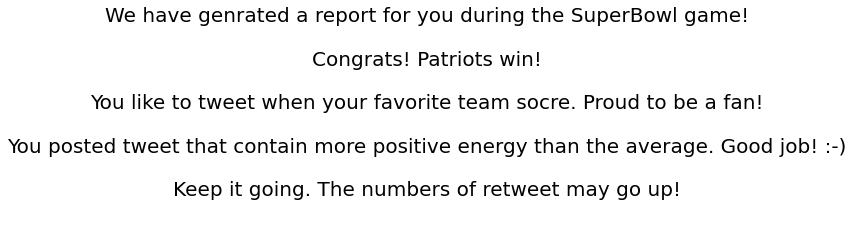

In [ ]:
user_report(example_dict)